In [1]:
import PollingSystem as PS
import MarkovianRP as MRP
import StaticRP as SRP
import numpy as np

from matplotlib import pyplot as plt
from importlib import reload 

In [59]:
reload(PS)
beta = 1/16
els = np.array([0.3, 0.01, 0.01])/beta
#els = np.array([0.3, 0.1, 0.1])/beta
ps = PS.PollingSystem(els, beta)
S = np.array([[ 0.        , 11.01635149, 14.27059899],
       [11.01635149,  0.        , 17.132717  ],
       [14.27059899, 17.132717  ,  0.        ]])
#S = 4*np.ones((3,3))

pi = np.array([0.99764782, 0.00135218, 0.001])
#pi = np.array([1/3, 1/3, 1/3])
rp = MRP.RandomRP(pi)
#are we super off with cyclic as well?
#rp = SRP.CyclicRP([0,2,1])
#S = np.array([11.01635149, 14.27059899, 17.132717])
# wait = ps.calc_avg_wait(rp, np.array([S[0,2], S[2,1], S[1,0]]))
hrs = 2
mins = hrs*60
seconds = mins*60
xt, wt, queues, avg_switching, polling_instants, T = ps.simulate(rp, S, seconds)



Empirical backward recurrence times:
 [[8.88203711e-02 1.16155250e+01 1.52305349e+01]
 [4.36602183e+01 5.86441881e+01 5.67967135e+01]
 [7.96795833e+01 9.03378578e+01 9.20107359e+01]]
Thr backward recurrence times:
 [[ 0.08585268 11.67192898 15.14763604]
 [51.75662686 63.34270316 66.81841022]
 [70.588953   82.1750293  85.65073636]]
Empirical Wait Time: 15.6542
Theoretical Wait Time: 15.6718
Diff: -0.0176 (-0.0011)

Empirical pi: [9.97538134e-01 1.49691339e-03 9.64952433e-04]
Theoretical pi: [0.99764782 0.00135218 0.001     ]
Lbar MC Emp: 20.6697
lbar mc thr: 20.0044
Emp mc Lbar_0: 0.4443 
Thr mc Lbar_0: 0.4280
Emp Lbar mc at 0 given 0: 0.3002
Thr Lbar mc at 0 given 0: 0.2885
Emp mc Lbar_1: 7.2229 
Thr mc Lbar_1: 8.2816
Emp Lbar mc at 1 given 1: 9.4793
Thr Lbar mc at 1 given 1: 10.0335
Emp mc Lbar_2: 13.0025 
Thr mc Lbar_2: 11.2948
Emp Lbar mc at 2 given 2: 15.2308
Thr Lbar mc at 2 given 2: 13.5671
Empirical lbar:58.918182
Expected Lbar from Little's, Thr Wait: 80.2397
Empirical Average 

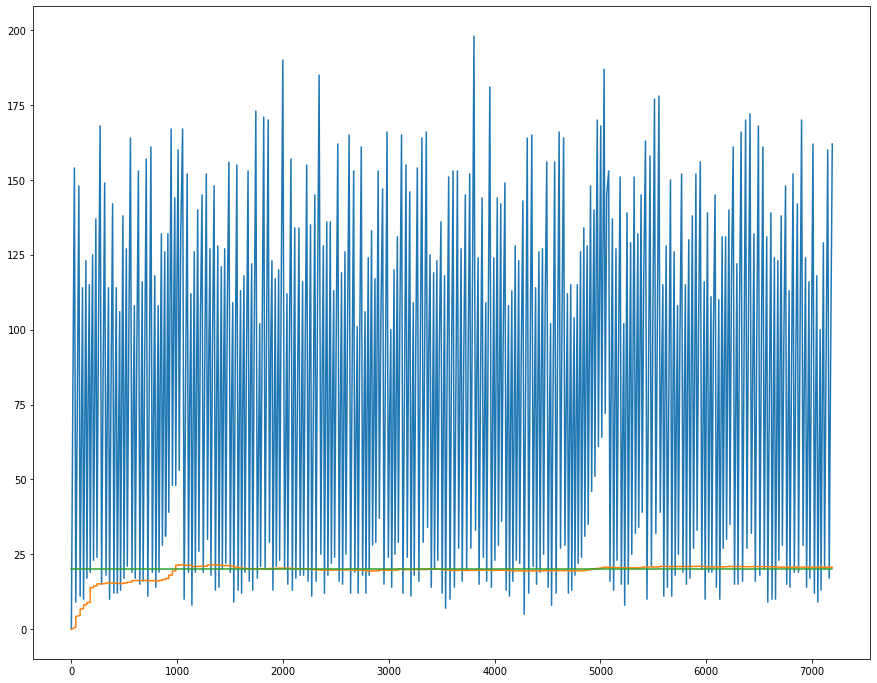

In [60]:

print("Empirical backward recurrence times:\n", T)
Tthr = np.array([ [ ps._Tij_avg(S, pi, i, j) for j in range(ps.n)] for i in range(ps.n)])
print("Thr backward recurrence times:\n", Tthr)
wait = ps.calc_avg_wait(S,rp)
print('Empirical Wait Time: %.4f'%(wt[-1][1]))
print("Theoretical Wait Time: %.4f"%(wait))
diff = wt[-1][1] - wait
print("Diff: %.4f (%.4f)\n"%(diff, diff/wt[-1][1]) )

plgis = np.array(polling_instants)
uni, counts = np.unique(plgis[:,1], return_counts = True)

print("Empirical pi:", (counts/sum(counts)))
print("Theoretical pi:", (pi))

xt = np.array(xt)
int_queue_length = 0
average_at_polling = 0
for i in range(len(xt)-1):
    int_queue_length += (xt[i+1,0]-xt[i,0])*sum(xt[i,2:])


Lbarmc = 0
sys_lengths = []
sys_lengths_i = []
lbar_i_given_i = np.zeros(3)
for i in range(len(plgis)):
    inst = plgis[i,0]
    z = int(plgis[i,1])
    idx = np.where(xt[:,0]==inst)
#     print(idx)
    idx = idx[0][0]
    sys_lengths.append(sum(xt[idx,2:]))
    sys_lengths_i.append(xt[idx,2:])
    lbar_i_given_i[z] += xt[idx, 2+z]
    Lbarmc += sys_lengths[-1]
plt.figure(figsize=(15,12))   
plt.plot(plgis[:,0], sys_lengths)
plt.plot(plgis[:,0], np.cumsum(sys_lengths)/np.arange(1,len(sys_lengths)+1,1) )
print("Lbar MC Emp: %.4f"%(Lbarmc/len(plgis)))
Lmc = ps._LSys_mc_avg(S, pi)
print("lbar mc thr: %.4f"%(Lmc))
plt.plot([0,plgis[-1,0]], [Lmc, Lmc])


sys_lengths_i = np.array(sys_lengths_i)
for i in range(3):
    print("Emp mc Lbar_%d: %.4f "%(i,np.average(sys_lengths_i[:,i]) ))
    print("Thr mc Lbar_%d: %.4f"%(i, ps._Li_mc_avg(S, pi,i)))
    print("Emp Lbar mc at %d given %d: %.4f"%(i, i, lbar_i_given_i[i]/counts[i] ))
    print("Thr Lbar mc at %d given %d: %.4f"%(i, i, ps._Li_mc_avg_at_i(S, pi,i)))
    
lbar = int_queue_length/xt[-1][0]
print("Empirical lbar:%f" %(lbar))
#littles_law_wait
print('Expected Lbar from Little\'s, Thr Wait: %.4f'%(wait*sum(els)))#over all time
#print("Theoretical Lbar: %.4f"%(wait2*sum(els)))


print("Empirical Average Switching: %f"%( avg_switching))
sbar = pi.T@ S @pi
print("thr Average Switching: %f"%(sbar))

print("Thr W based on empirical lbar: %f"%(lbar/sum(els)))

print("Empirical average stage duration: %.4f"%( (plgis[-1,0] - plgis[0,0])/(len(plgis) -1) ))
print("Theoretical average stage duration: %.4f"%(sbar/(1-beta*sum(els))))

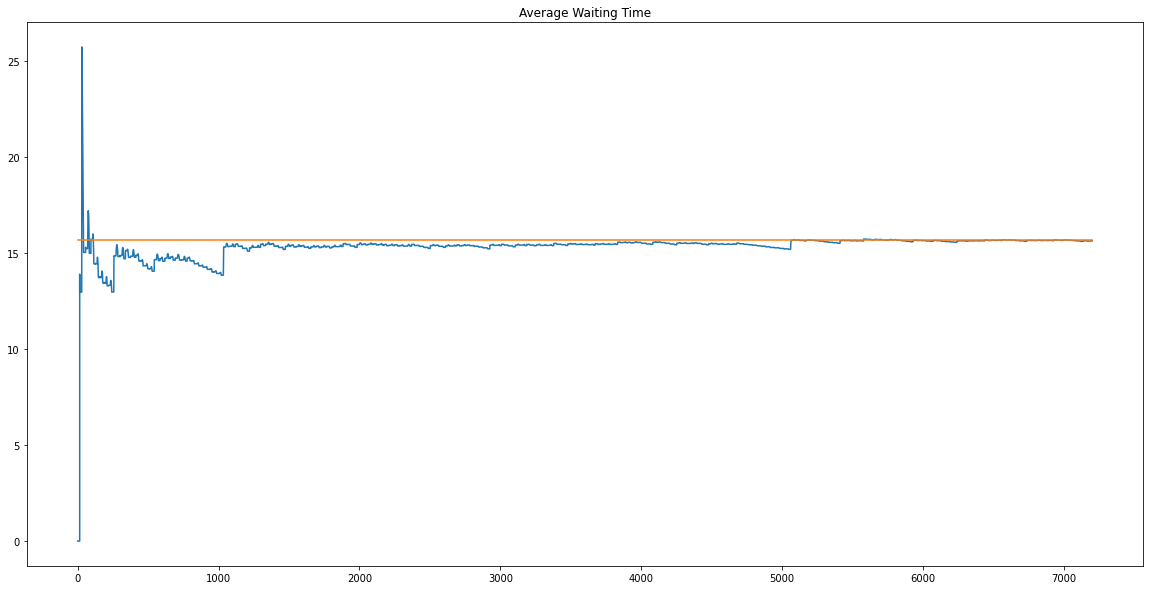

In [61]:
wt = np.array(wt)
fig = plt.figure(figsize=[20,10])
plt.plot(wt[:,0], wt[:,1])
plt.title("Average Waiting Time")
#plt.xlim(6500,8000)
#plt.ylim(12,13)
plt.plot([0, wt[-1, 0]], [wait, wait])
plt.show()

In [62]:
#NOTE: decreasing switching time does NOT guarantee decreasing average waiting time

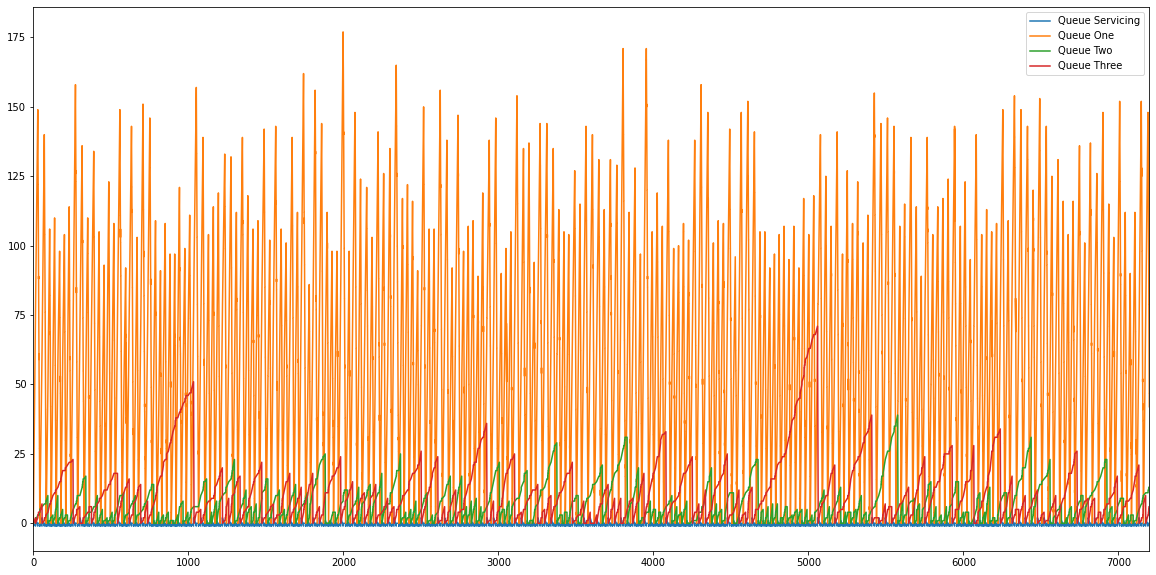

In [63]:
xt = np.array(xt)
fig = plt.figure(figsize=[20,10])
plt.plot(xt[:,0], xt[:,1], label = 'Queue Servicing')
plt.plot(xt[:,0], xt[:,2], label = 'Queue One')
plt.plot(xt[:,0], xt[:,3], label = 'Queue Two')
plt.plot(xt[:,0], xt[:,4], label = 'Queue Three')
plt.legend()
plt.xlim(0,seconds)
# plt.ylim(-2,110)
plt.show()

In [64]:
res = ps.calc_optimal_rp(S)
print(res)

     fun: 15.635941254603475
     jac: array([ 9.37137878,  9.30616856, 22.59863245])
 message: 'Optimization terminated successfully'
    nfev: 110
     nit: 22
    njev: 22
  status: 0
 success: True
       x: array([0.99739444, 0.00160556, 0.001     ])


/home/win/.local/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:579: ComplexWarning: Casting complex values to real discards the imaginary part
  J_transposed[i] = df / dx
/home/win/.local/lib/python3.8/site-packages/scipy/optimize/slsqp.py:427: ComplexWarning: Casting complex values to real discards the imaginary part
  slsqp(m, meq, x, xl, xu, fx, c, g, a, acc, majiter, mode, w, jw,
/home/win/.local/lib/python3.8/site-packages/scipy/optimize/optimize.py:282: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "


4.906647130845505


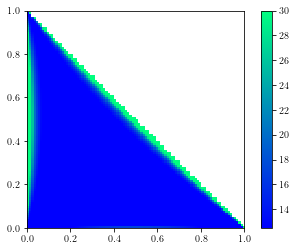

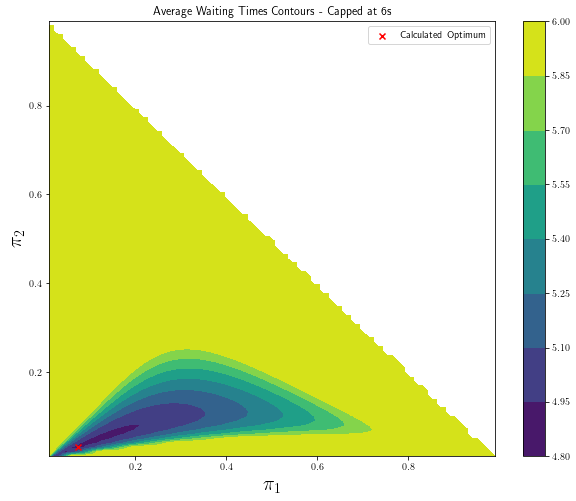

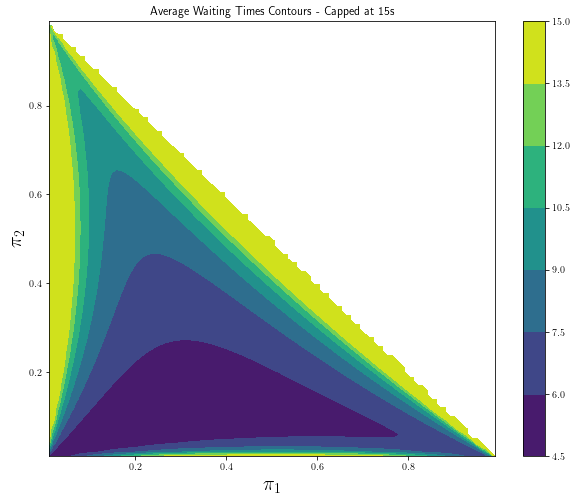

In [50]:
import matplotlib
matplotlib.rcParams['text.usetex'] = True

gran = 100
pi1 = np.linspace(1/gran,1-(1/gran), gran)
pi2 = np.linspace(1/gran,1 - (1/gran), gran)
Z = -1*np.Inf*np.ones([gran, gran])

fmin = 10000
for i in range(gran):
    for j in range(gran):
        pi = np.array([pi1[i], pi2[j], 1 - pi1[i] - pi2[j]])
        if pi[2] > 0:
            Z[i,j] = ps._calc_avg_wait_random( pi , S)
            if Z[i,j] < fmin:
                fmin=Z[i,j]
print(fmin)

fig, ax = plt.subplots()
ws = ax.imshow(np.transpose(Z), extent=[0,1,0,1], cmap='winter', interpolation='nearest',
               vmin=12.5,vmax=30, origin='lower')
fig.colorbar(ws)
plt.show()

fig = plt.figure(figsize=(10,8))
cont = plt.contourf(pi1, pi2, np.minimum(Z.T, 6))
#cont = plt.contourf(pi1, pi2, np.minimum(np.log(Z.T), 2.6) )
fig.colorbar(cont)
plt.scatter(res.x[0], res.x[1], label='Calculated Optimum', marker='x', c='r')
plt.legend()
plt.title('Average Waiting Times Contours - Capped at 6s')
plt.xlabel('$\pi_1$', fontsize=20)
plt.ylabel('$\pi_2$', fontsize=20)
plt.show()

fig = plt.figure(figsize=(10,8))
cont = plt.contourf(pi1, pi2, np.minimum(Z.T, 15))
fig.colorbar(cont)
plt.title('Average Waiting Times Contours - Capped at 15s')
plt.xlabel('$\pi_1$', fontsize=20)
plt.ylabel('$\pi_2$', fontsize=20)
plt.show()

In [10]:
#Contours are clearly non-convex. We're not dealing with a convex function.
#There doesn't seem to be a good way to verify unimodality, either